# 1. Overview of Support Vector Machines

## 1.1. Definition
Support Vector Machines (SVM) is a supervised machine learning algorithm which can be used for both classification or
regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

## 1.2. How does SVM work?
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

## 1.3. Advantages and Disadvantages
### Advantages
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

### Disadvantages
- If the number of features is much greater than the number of samples, the method is likely to give poor performances.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.
- SVMs are not very efficient computationally if your dataset is very big, such as when you have more than 100k rows.
- SVMs do not work well with large datasets because of the high training time.
- The SVM algorithm is not suitable for large data sets.
- SVM does not perform very well, when the data set has more noise i.e. target classes are overlapping.
- In cases where number of features for each data point exceeds the number of training data samples, the SVM will underperform.
- As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact. 

## 1.4 Kernel Functions
In the SVM algorithm, we can use different kernel functions to map our data into higher dimensional space. These functions can be different types. Some of the most popular kernel functions are:
### Linear Kernel
A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
### Polynomial Kernel
A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
### Radial Basis Function Kernel
The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
### Sigmoid Kernel
The sigmoid kernel function can be used as a neural network, a logistic regression, etc.

## 1.5 Notice when preparing data and training model
### 1.5.1 Data Preprocessing
- SVMs are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1.
- Missing values are not handled in SVM.
- One-class SVM, which is a variant of the original SVM, is designed for unsupervised anomaly detection.
- The SVM algorithm is not suitable for large data sets.
- SVMs do not work well with large datasets because of the high training time.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.
- Check linear separability of the data.
- Check the balance of the data.
### 1.5.2 Model Training parameters
- C: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- kernel: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
- degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.
- coef0: Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
- probability: Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method.
- shrinking: Whether to use the shrinking heuristic.
- tol: Tolerance for stopping criterion.
- class_weight: Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one.
- verbose: Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.
- max_iter: Hard limit on iterations within solver, or -1 for no limit.
- decision_function_shape: Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.
- break_ties: If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Please note that breaking ties comes at a relatively high computational cost compared to a simple predict.
- random_state: The seed of the pseudo random number generator to use when shuffling the data for probability estimates. 

# 2. Loading and Exploring Data

In [237]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [238]:
# Load the data
data_train = pd.read_csv('DataMining/input/train.csv')
data_test = pd.read_csv('DataMining/input/test.csv')
# Merge the data
data=pd.concat([data_train,data_test],sort=False)


In [239]:
# Display the first 5 rows
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2.1 Data Exploration

In [240]:
# Display the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

# 3. Data Preprocessing

In [241]:
data=data.drop(['Unnamed: 0','id'],axis=1)

In [242]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

## 3.1. Handling Missing Values

In [243]:
# Check for missing values
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [244]:
# Fill missing values with the median
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\3236196333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


## 3.2. Transforming Data

In [245]:
# log transformation
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)

## 3.3. Handling Duplicate Values

In [246]:
# Check for duplicate values
data.duplicated().sum()

np.int64(0)

In [247]:
# Drop duplicate values
data.drop_duplicates(inplace=True)

## 3.4. Encoding Categorical Variables

In [248]:
label_encoder = LabelEncoder()
header={
    'Gender': ['Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'disloyal Customer'],
    'Type of Travel': ['Personal Travel', 'Business travel'],
    'Class': ['Eco', 'Eco Plus', 'Business'],
    'satisfaction': ['neutral or dissatisfied', 'satisfied']
}
for key in header:
    data[key] = label_encoder.fit_transform(data[key])
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,3.218876,2.890372,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,0.000000,1.791759,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.000000,0.000000,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,2.397895,2.197225,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0.000000,0.000000,1


## 3.5. Feature Scaling

In [249]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\3362776561.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01487815  1.01487815 -0.98533997 ... -0.98533997  1.01487815
 -0.98533997]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\3362776561.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.47342178  2.11228136 -0.47342178 ... -0.47342178 -0.47342178
 -0.47342178]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7208\3362776561.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of panda

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.014878,-0.473422,-1.747961,1.493951,2.262940,-0.732184,0.204090,0.617265,0.173445,-1.546267,...,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,1.267390,1.038841,0
1,1.014878,2.112281,-0.954274,-0.669366,-0.955724,-0.957760,0.204090,-0.692719,0.173445,0.018048,...,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.728840,0.361193,0
2,-0.985340,-0.473422,-0.888133,-0.669366,-0.955724,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,...,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.728840,-0.744004,1
3,-0.985340,-0.473422,-0.954274,-0.669366,-0.955724,-0.629924,-0.548166,1.272257,1.600249,1.582364,...,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,0.758248,0.611293,0
4,1.014878,-0.473422,1.426788,-0.669366,-0.955724,-0.978814,0.204090,-0.037727,0.173445,0.018048,...,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.728840,-0.744004,1


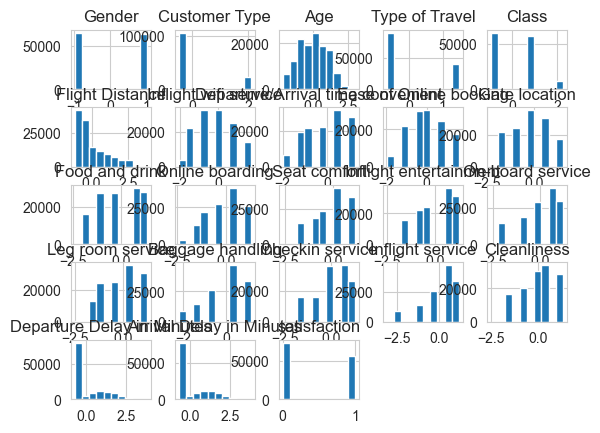

In [250]:
#histogram with sns
data.hist()
plt.show()

## 3.6. Correlation Matrix

In [251]:
corr=data.corr()
corr['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Age                                  0.134091
Gender                               0.011236
Gate location                       -0.002793
Departure/Arrival time convenient   -0.054270
Departure Delay in Minutes          -0.072141
Arrival Delay in Minutes            -0.102104
Customer Type                       -0.186017
Class                             

In [252]:
# remove duplicate columns
data = data.T.drop_duplicates().T

# 4. Building the Model

In [253]:
# Split the data into train and test sets
train = data[data['satisfaction'].notnull()]
test = data[data['satisfaction'].isnull()]
X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

In [254]:
threadhold = 0.15
correlation = data.corr()['satisfaction']
selected_features = correlation[(correlation > threadhold) | (correlation < -threadhold)].index
selected_features = selected_features.drop('satisfaction')
X = X[selected_features]

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [256]:
# Display the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (103904, 16)
X_test shape:  (25976, 16)


In [257]:
# Create the model poly, rbf, sigmoid, linear
model = SVC(kernel='poly', C=1, gamma=0.1, random_state=42)
# Train the model
model.fit(X_train, y_train)


SVC(C=1, gamma=0.1, kernel='poly', random_state=42)

In [258]:
# Make predictions
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [259]:
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.9398868186017862
Test score:  0.9374422543886665


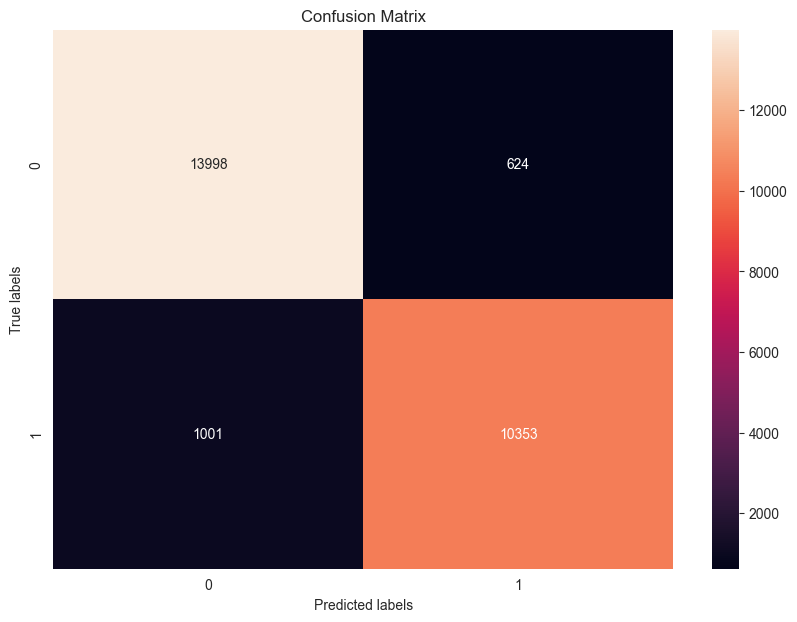

In [260]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     14622
         1.0       0.94      0.91      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [262]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     58830
         1.0       0.94      0.92      0.93     45074

    accuracy                           0.94    103904
   macro avg       0.94      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904



In [263]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9374422543886665


In [264]:
# Make predictions